In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
# 模拟数据

df1 = pd.DataFrame(np.arange(100, 130), columns=['price'])
df2 = pd.DataFrame(list(range(130, 100, -1)), columns=['price'])
df3 = pd.DataFrame(np.arange(100, 150), columns=['price'])
df4 = pd.DataFrame(list(range(150, 100, -1)), columns=['price'])
df5 = pd.DataFrame(np.arange(100, 130), columns=['price'])
df6 = pd.DataFrame(list(range(130, 100, -1)), columns=['price'])
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

<IPython.core.display.Javascript object>


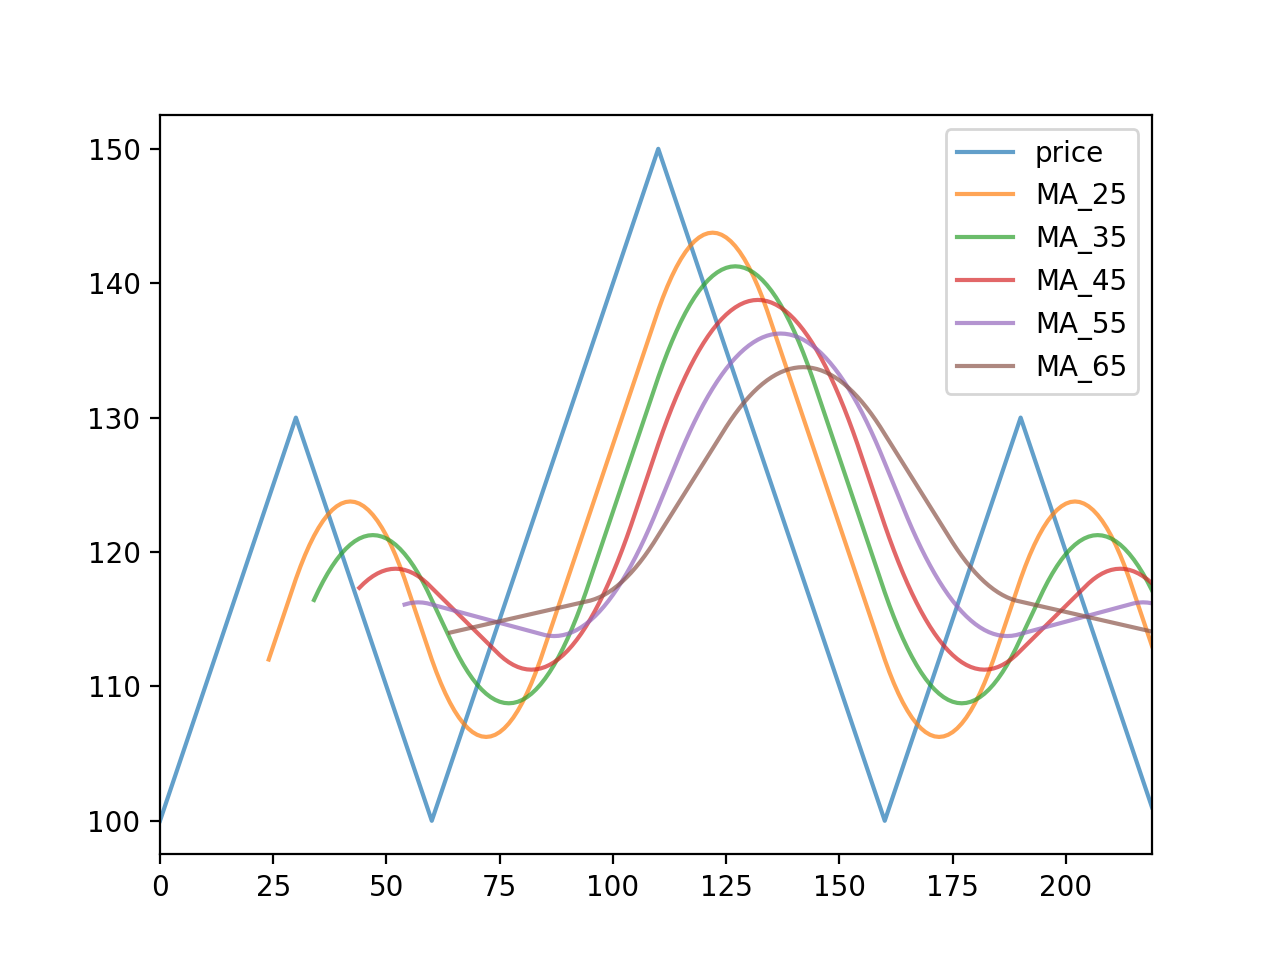

In [20]:
# 移动平均

df_ma = df.copy()

df_ma['MA_25'] = df_ma.price.rolling(25).mean()
df_ma['MA_35'] = df_ma.price.rolling(35).mean()
df_ma['MA_45'] = df_ma.price.rolling(45).mean()
df_ma['MA_55'] = df_ma.price.rolling(55).mean()
df_ma['MA_65'] = df_ma.price.rolling(65).mean()

df_ma.plot(alpha=0.7)

In [ ]:
# 二次移动平均
# 反应慢（不能及时捕捉趋势），delta也被一次移动平均所捕获了，所以整体而言不太好，不画出来了。

<IPython.core.display.Javascript object>


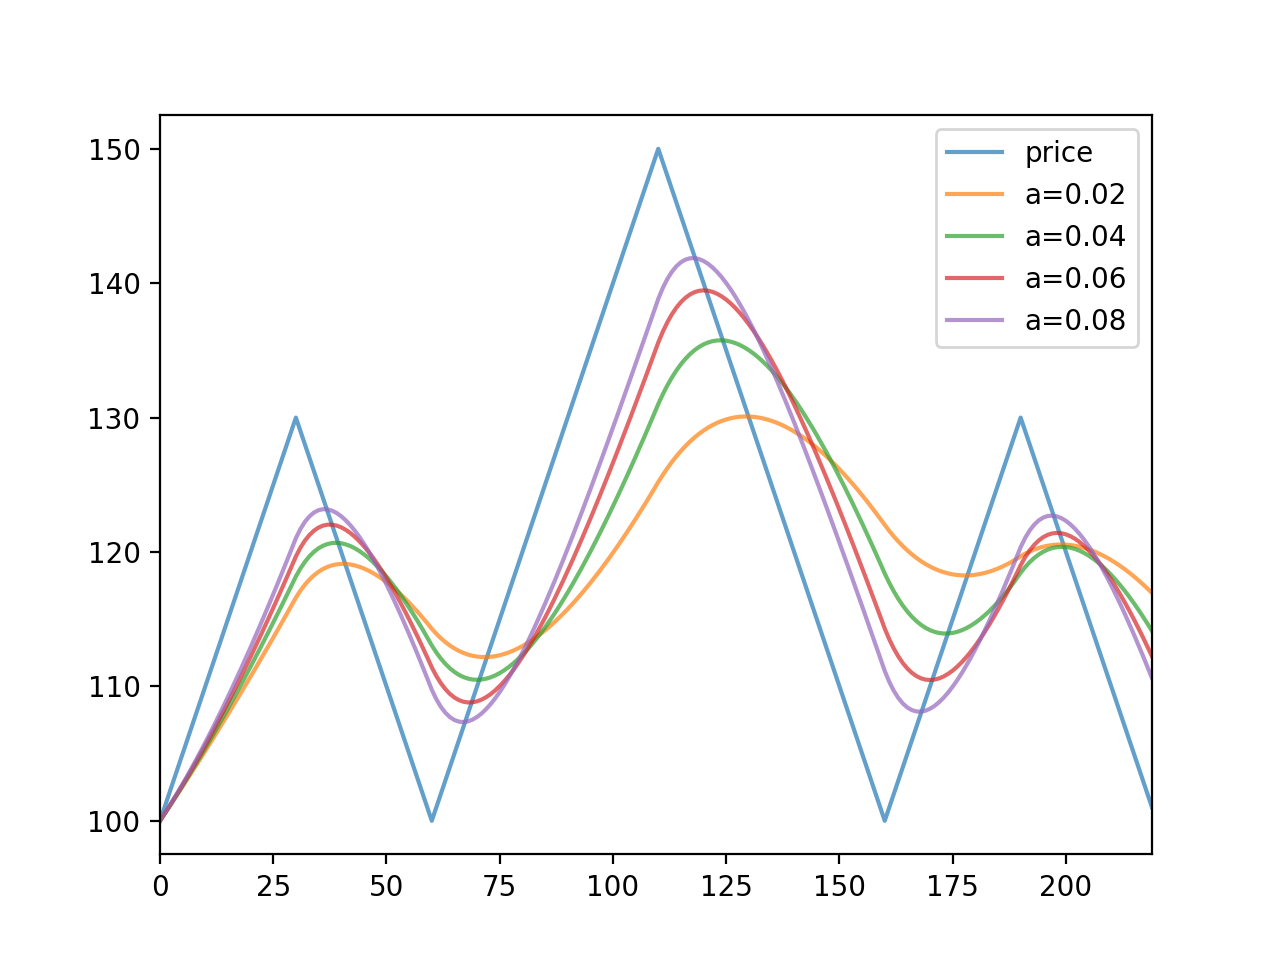

In [54]:
# 指数平均  - alpha

df_ewm = df.copy()

for n in np.arange(1, 5):
    a_value = n / 50
    a = '%.2f' % a_value
    df_ewm['a=%s' % a_value] = df_ewm.price.ewm(alpha=a_value).mean()
    
df_ewm

df_ewm.plot(alpha=0.7)

- alpha线性增加越大，趋势跟踪越快，跟踪的变化幅度递减。（a越小越平缓）

<IPython.core.display.Javascript object>


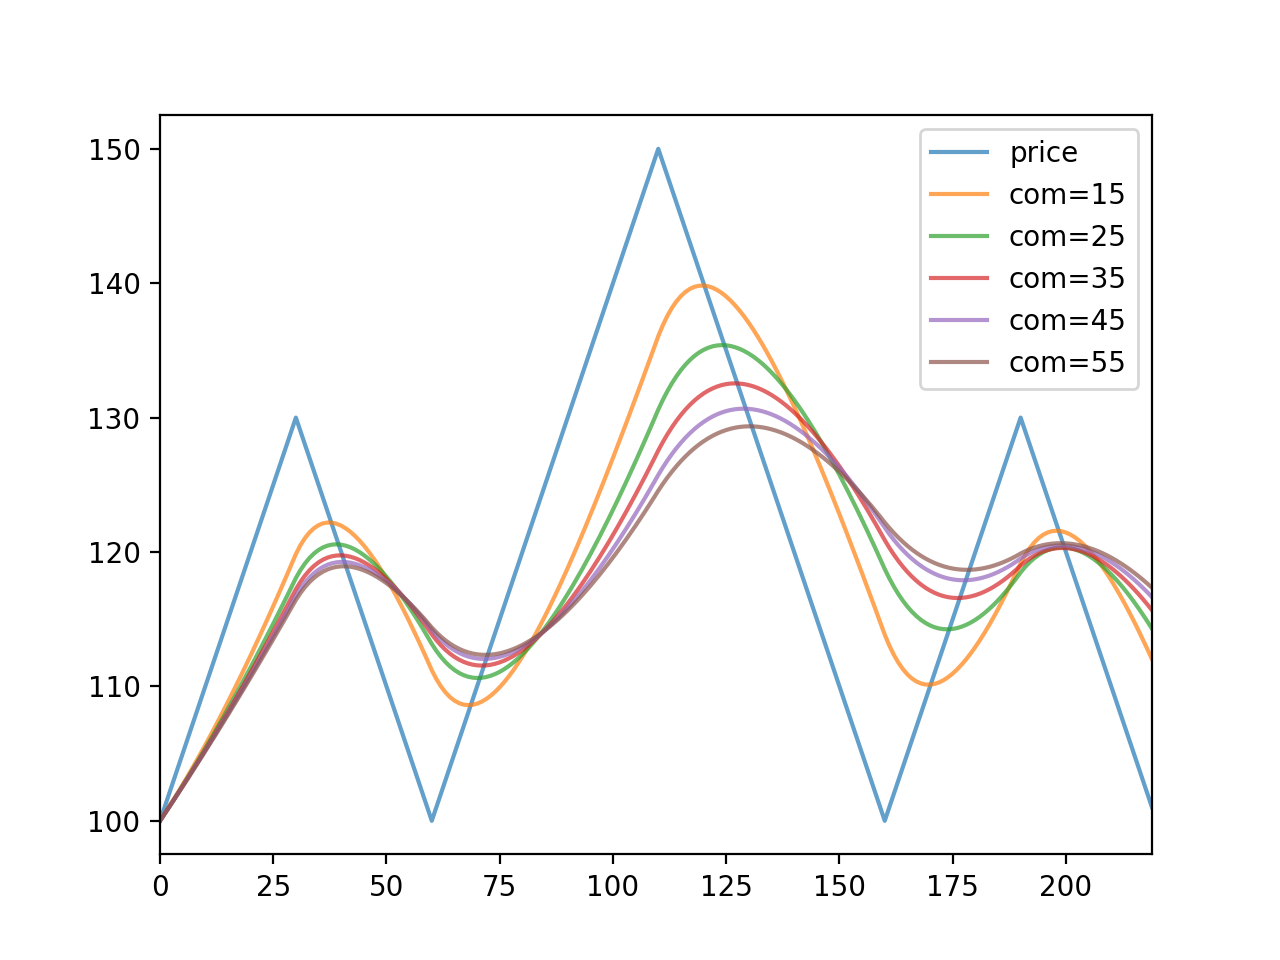

In [48]:
# 指数平均  - com

df_ewm = df.copy()

for n in np.arange(15, 60, 10):
    com_value = n
    com = '%.2f' % com_value
    df_ewm['com=%s' % com_value] = df_ewm.price.ewm(com=com_value).mean()
    
df_ewm

df_ewm.plot(alpha=0.7)

<IPython.core.display.Javascript object>


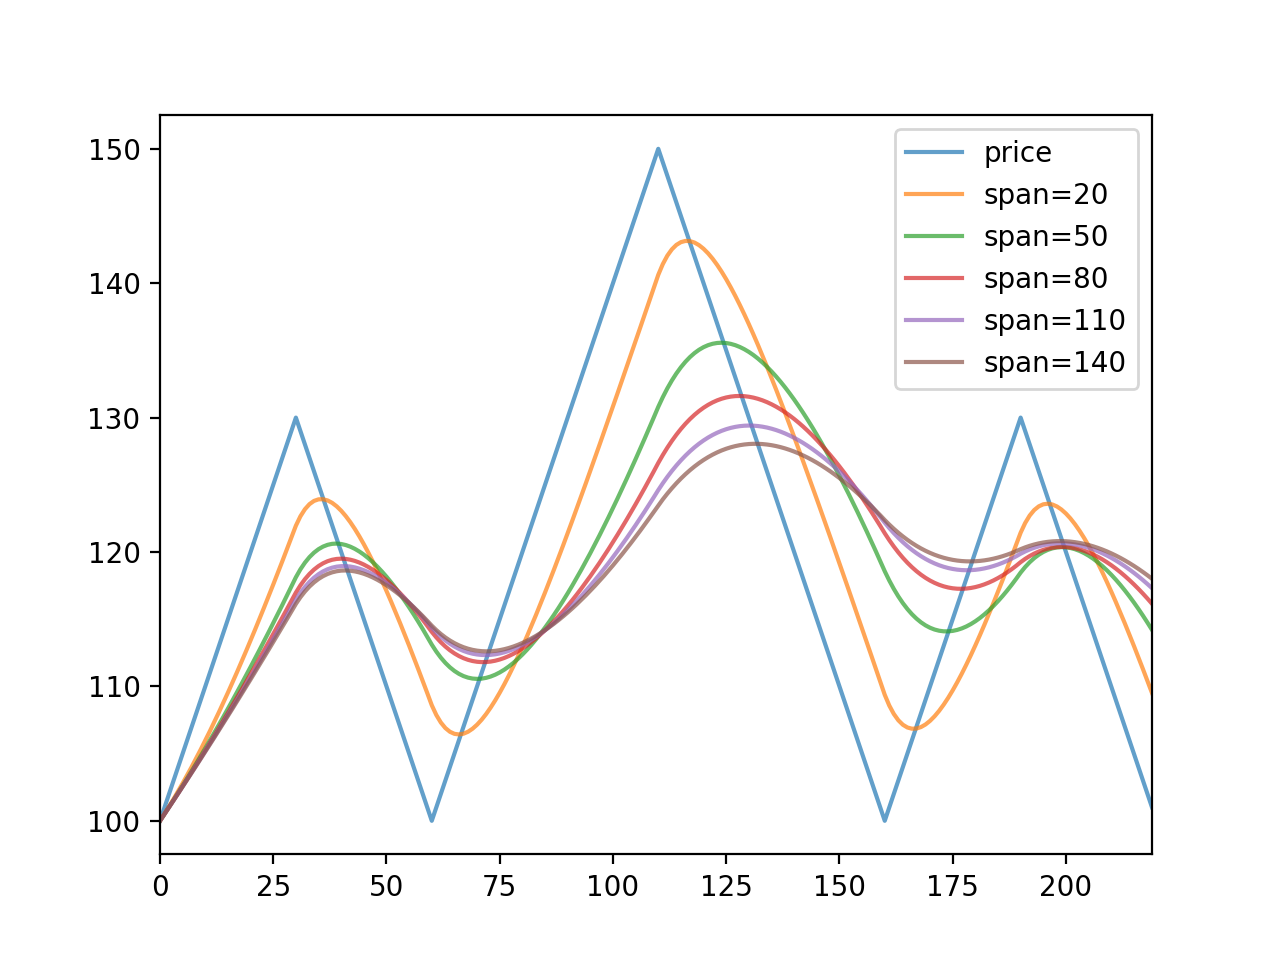

In [46]:
# 指数平均  - span

df_ewm = df.copy()

for n in np.arange(20, 151, 30):
    span_value = n
    span = '%.2f' % span_value
    df_ewm['span=%s' % span_value] = df_ewm.price.ewm(span=span_value).mean()
    
df_ewm

df_ewm.plot(alpha=0.7)

<IPython.core.display.Javascript object>


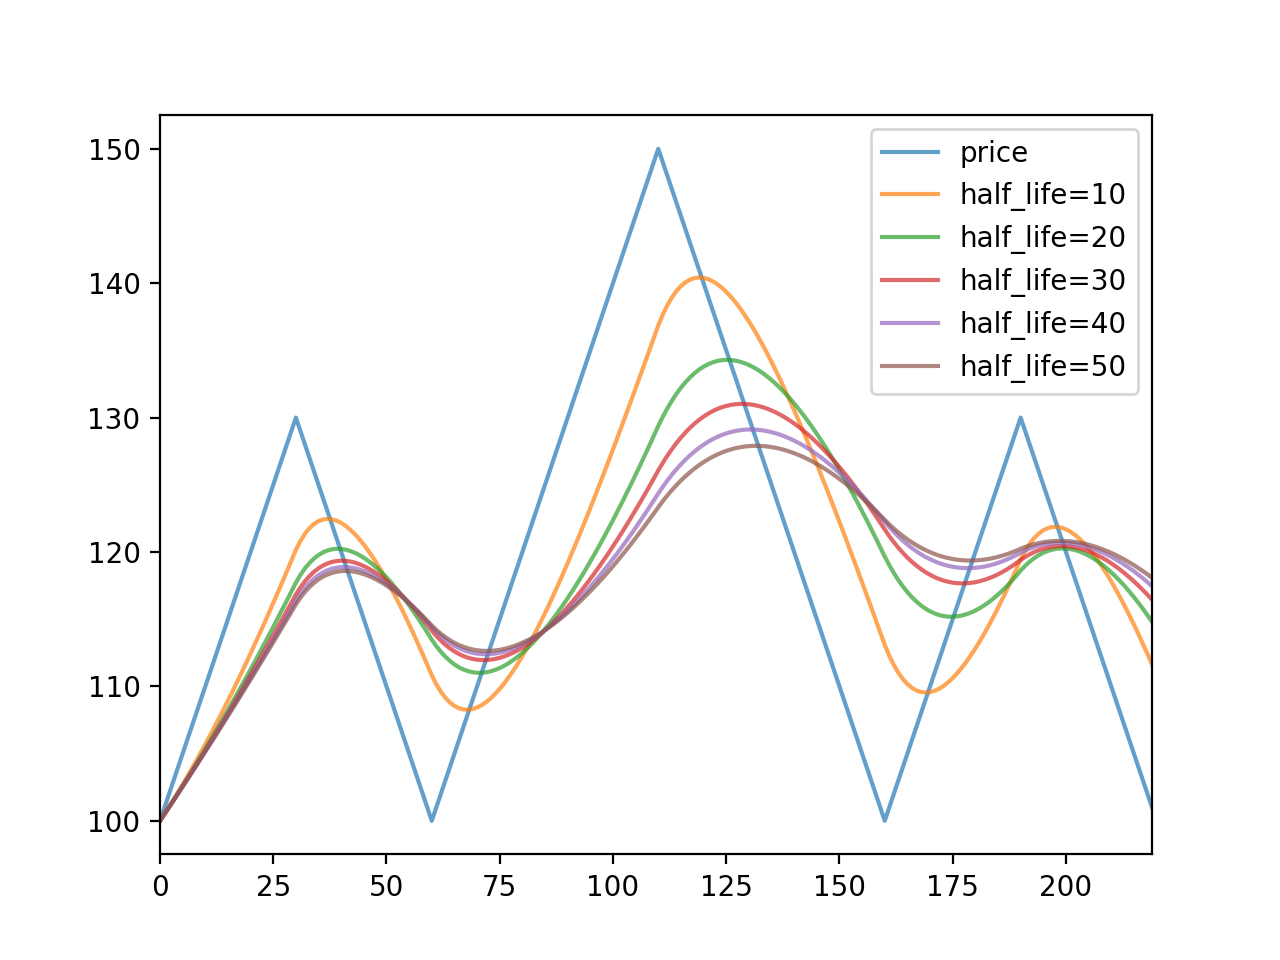

In [43]:
# 指数平均  - half_life

df_ewm = df.copy()

for n in np.arange(10, 51, 10):
    half_life_value = n
    half_life = '%.2f' % half_life_value
    df_ewm['half_life=%s' % half_life_value] = df_ewm.price.ewm(halflife=half_life_value).mean()
    
df_ewm

df_ewm.plot(alpha=0.7)

- com / span / half_life 共同点：
    - 数值越大，越平缓
    - 数值线性增加，平滑程度变化递减

<IPython.core.display.Javascript object>


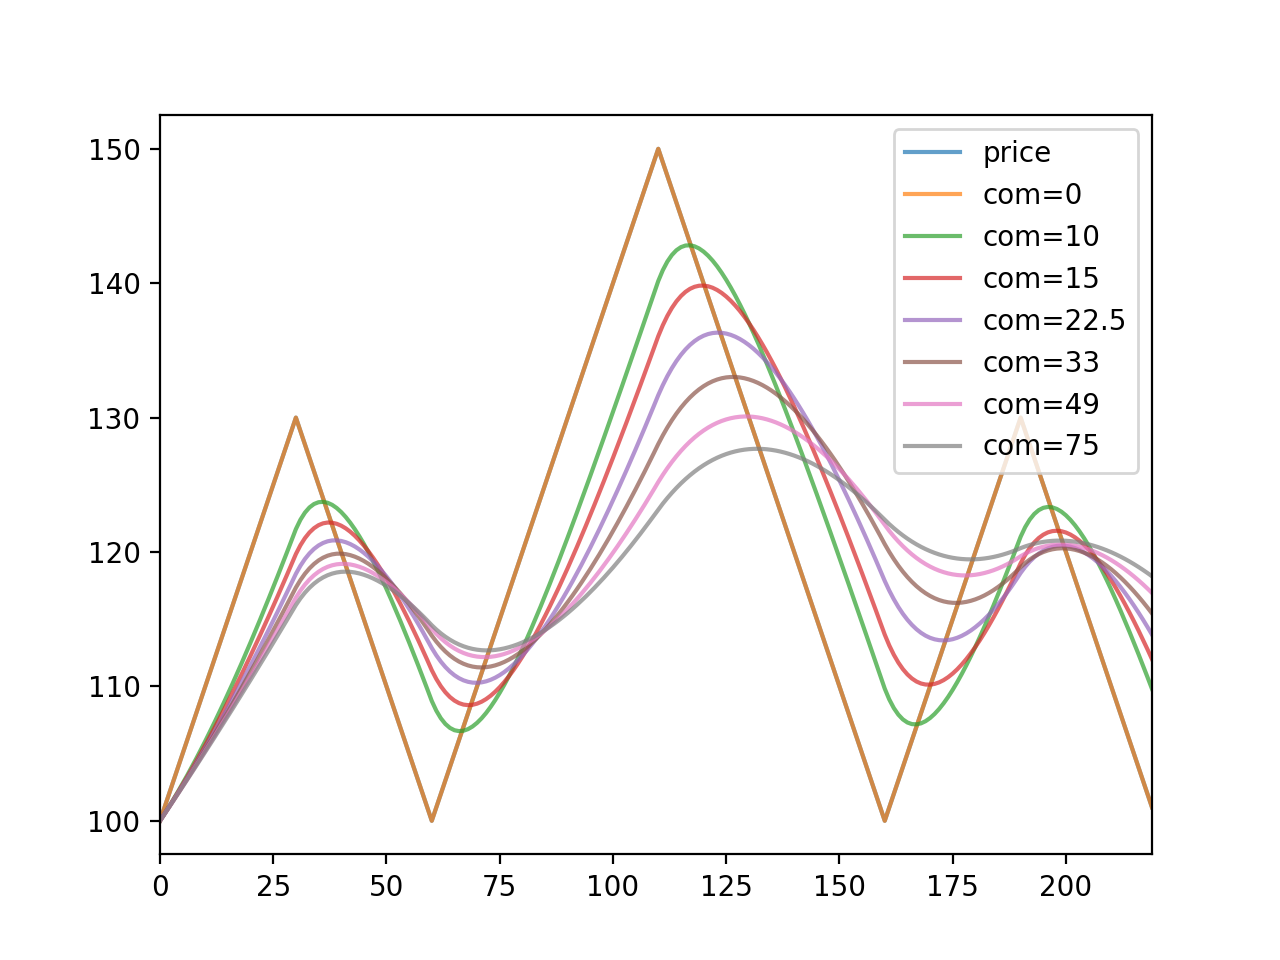

In [50]:
# 指数平均  - com 的探索：参数指数变化

df_ewm = df.copy()

for n in [0, 10, 15, 22.5, 33, 49, 75]:
    com_value = n
    com = '%.2f' % com_value
    df_ewm['com=%s' % com_value] = df_ewm.price.ewm(com=com_value).mean()
    
df_ewm

df_ewm.plot(alpha=0.7)

- 结论：com如果是等比递增，则平滑幅度变化为线性！？

<IPython.core.display.Javascript object>


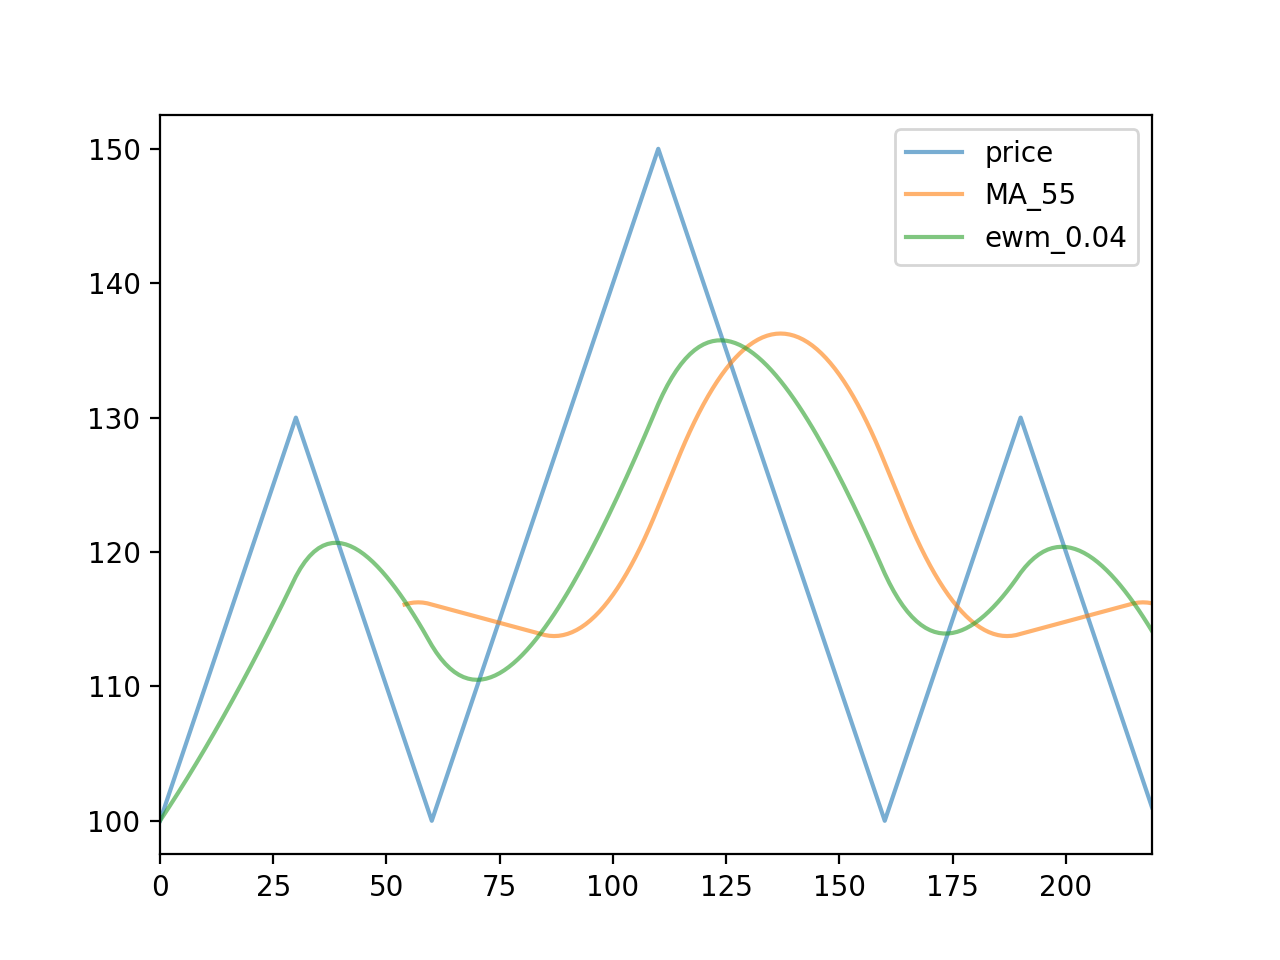

In [21]:
# 对比简单移动平均、指数平均  --幅度相同，指数反应更快

df.price.plot(alpha=0.6)
df_ma.MA_55.plot(alpha=0.6)
df_ewm['a=0.04'].plot(alpha=0.6)
plt.legend(['price', 'MA_55', 'ewm_0.04'])